##Task

In [32]:
import pandas as pd
import numpy as np
df=pd.read_csv("Trading-features.csv")
import sklearn

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df.head()

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 164 entries, id to f161
dtypes: float64(136), int64(27), object(1)
memory usage: 12.5+ MB


In [36]:
df.describe()

,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.546190e+07,42938.580560,0.000414,20149.80990,-40.236010,42.252370,2.016360,0.523120,1.103560,2.29049,...,533.201440,-74.606490,533.201440,-74.606490,-74.606490,533.201440,533.201440,-74.606490,-74.606490,533.201440
std,2.890879e+03,205.486455,0.000018,2897.95985,7.212493,9.346334,5.339766,12.883223,17.590602,24.03562,...,177.929894,46.736091,177.929894,46.736091,46.736091,177.929894,177.929894,46.736091,46.736091,177.929894
min,5.545690e+07,42659.500000,0.000397,15139.00000,-57.800000,15.000000,-27.100000,-51.900000,-59.900000,-75.70000,...,301.200000,-196.300000,301.200000,-196.300000,-196.300000,301.200000,301.200000,-196.300000,-196.300000,301.200000
25%,5.545940e+07,42747.400000,0.000400,17642.00000,-46.000000,35.700000,0.000000,-5.600000,-8.300000,-11.00000,...,359.100000,-104.825000,359.100000,-104.825000,-104.825000,359.100000,359.100000,-104.825000,-104.825000,359.100000
50%,5.546190e+07,42835.850000,0.000408,20146.00000,-38.200000,40.500000,0.800000,0.000000,0.100000,0.40000,...,450.800000,-61.200000,450.800000,-61.200000,-61.200000,450.800000,450.800000,-61.200000,-61.200000,450.800000
75%,5.546441e+07,43145.225000,0.000417,22652.25000,-34.500000,48.500000,3.900000,5.725000,8.800000,12.20000,...,712.325000,-37.700000,712.325000,-37.700000,-37.700000,712.325000,712.325000,-37.700000,-37.700000,712.325000
max,5.546691e+07,43262.000000,0.000463,25196.00000,-22.100000,124.200000,85.300000,135.000000,135.700000,179.00000,...,831.300000,49.400000,831.300000,49.400000,49.400000,831.300000,831.300000,49.400000,49.400000,831.300000


In [37]:
for i in df:
    if df[i].dtype == object:
        print(i)

created_at


In [38]:
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')
df['hour'] = df['created_at'].dt.hour
df['minute'] = df['created_at'].dt.minute
df['second'] = df['created_at'].dt.second

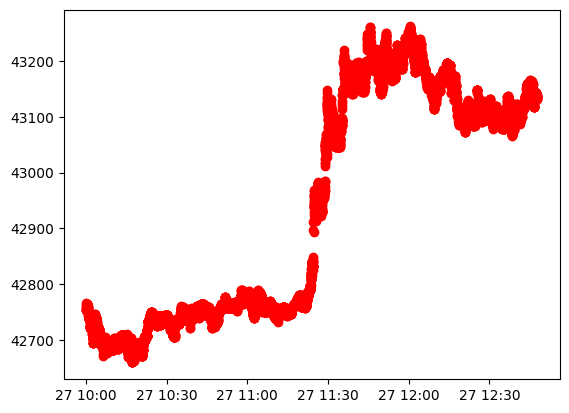

In [39]:
plt.scatter(df.created_at, df.last_price, label='Scatter Plot', color='Red', marker='o')

In [40]:
df.isnull().sum()
df.columns[df.isnull().sum() > 0].tolist()
df.fillna(df.mean(), inplace=True)


<ipython-input-40-33bf1f56b1bd>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


In [41]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

<Axes: xlabel='last_price'>

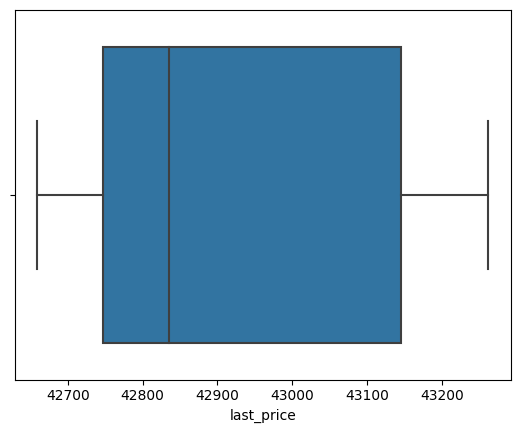

In [42]:
# sns.boxplot(x=df['last_price'])

sns.boxplot(x=df['last_price'])

In [43]:
your_data=df.drop(["last_price","created_at","id"],axis=1)

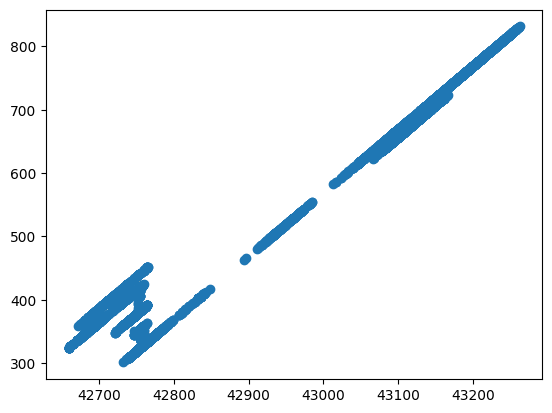

In [44]:
plt.scatter(df['last_price'],df['f161'])

In [45]:
df.corr()

<ipython-input-45-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,last_price,f1,f2,f3,f4,f5,f6,f7,f8,...,f155,f156,f157,f158,f159,f160,f161,hour,minute,second
id,1.000000,0.870170,0.715610,-0.999994,-0.832428,0.661117,0.032799,0.004215,0.005995,0.007076,...,-0.460389,-0.460389,0.794230,0.794230,-0.460389,-0.460389,0.794230,0.940649,0.198057,-0.005037
last_price,0.870170,1.000000,0.543172,-0.869881,-0.747808,0.628199,0.089479,0.034578,0.047083,0.063563,...,-0.300865,-0.300865,0.983107,0.983107,-0.300865,-0.300865,0.983107,0.795182,0.238711,-0.005170
f1,0.715610,0.543172,1.000000,-0.714104,-0.661259,0.476699,-0.058793,-0.038621,-0.057812,-0.084587,...,-0.813458,-0.813458,0.546212,0.546212,-0.813458,-0.813458,0.546212,0.697041,0.068638,-0.006310
f2,-0.999994,-0.869881,-0.714104,1.000000,0.832001,-0.660871,-0.032946,-0.004372,-0.006228,-0.007418,...,0.458766,0.458766,-0.793673,-0.793673,0.458766,0.458766,-0.793673,-0.940228,-0.199286,0.005043
f3,-0.832428,-0.747808,-0.661259,0.832001,1.000000,-0.822284,-0.088552,-0.125136,-0.130386,-0.125026,...,0.491244,0.491244,-0.701679,-0.701679,0.491244,0.491244,-0.701679,-0.830151,-0.028196,0.014159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f160,-0.460389,-0.300865,-0.813458,0.458766,0.491244,-0.280646,0.172307,0.180359,0.236978,0.300307,...,1.000000,1.000000,-0.329335,-0.329335,1.000000,1.000000,-0.329335,-0.490296,0.078390,-0.007740
f161,0.794230,0.983107,0.546212,-0.793673,-0.701679,0.591165,0.086965,0.032412,0.042938,0.056876,...,-0.329335,-0.329335,1.000000,1.000000,-0.329335,-0.329335,1.000000,0.724889,0.219615,-0.004920
hour,0.940649,0.795182,0.697041,-0.940228,-0.830151,0.652603,0.020972,-0.012594,-0.019251,-0.028882,...,-0.490296,-0.490296,0.724889,0.724889,-0.490296,-0.490296,0.724889,1.000000,-0.146287,-0.008972
minute,0.198057,0.238711,0.068638,-0.199286,-0.028196,0.041941,0.035325,0.048637,0.073691,0.104676,...,0.078390,0.078390,0.219615,0.219615,0.078390,0.078390,0.219615,-0.146287,1.000000,-0.006178


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(your_data, df.last_price, test_size=0.2)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score = regressor.score(X_test, y_test)
print('R2 score:', r2_score)


R2 score: 0.9996362633910189


In [47]:
regressor.coef_

array([-5.69230447e+05,  4.40832101e-02,  6.23901457e-02, -2.56268687e-02,
        3.67413887e-02, -1.24156551e-02, -7.05200413e-03,  3.15942760e-02,
       -1.08181492e-02,  6.29772936e-02,  2.25905038e-02, -1.32958320e-02,
       -1.21640685e-02, -2.92201952e-03,  5.33461210e-02, -2.12742021e-02,
       -2.12441063e-02, -3.19907619e-02,  1.83581334e-02, -3.31114490e-02,
        3.64292839e-02, -8.93662073e-02,  7.77016881e-02, -3.26510700e-06,
        2.00678668e-01, -7.47347600e-01, -4.98144045e-01, -1.60356271e+00,
        5.97637634e-01, -4.10150912e-01, -1.72759115e+00, -9.27055229e-01,
        4.12076397e-02, -4.54011949e-01,  6.95257299e-01,  1.82228151e+00,
       -3.78608071e-01,  1.62796682e-01, -2.96751927e-01, -9.44022126e-01,
        2.66679033e+00,  5.30664044e-01, -5.75228926e-01, -3.25601985e-01,
        3.08403607e-01, -8.99434011e-01,  9.43707108e-09,  7.01074582e+01,
        3.15392484e-01, -4.59085184e-09, -6.25176810e+01,  7.58518630e+01,
        1.68339143e+01,  

In [48]:
from math import inf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(your_data, df.last_price, test_size=0.2, random_state=40)
regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score_value = r2_score(y_test, y_pred)
print('R2 score:', r2_score_value)




R2 score: 0.6917216058224904


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
scaler = StandardScaler()
scaler.fit(your_data)
scaled_data = scaler.transform(your_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df.last_price, test_size=0.2)
regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score_value = r2_score(y_test, y_pred)
print('R2 score:', r2_score_value)



R2 score: 0.9411136305910274
